In [1]:
import scipy as sp
import numpy as np
import numpy.random as rd
import scipy.linalg as LA
import scipy.sparse.linalg as sLA
import time

#%matplotlib notebook     #INTERACTIVE PLOTS
#%matplotlib qt # wx, gtk, osx, tk           #INTERACTIVE PLOTS

import matplotlib.pyplot as plt
%matplotlib inline

Seed = 1207751
rd.seed(Seed)

In [2]:
import seaborn as sns
sns.set(style='whitegrid')

In [3]:
from RMG import RMG

In [4]:
def lambda_funct (evlA,evlB,T,k=0):
    return evlA+sp.special.lambertw(evlB*T*np.exp(-evlA*T),k=k)/T

In [5]:
#EIGENVALUES COMPUTATION
def comp_eig(M, sparse='no',symm='no'):
    evl=0
    if symm == 'no':
        if sparse =='no':
            evl = LA.eigvals(M)
        if sparse =='yes':
            mm = sp.sparse.csr_matrix(M)
            evl = sLA.eigs(mm,k=1,which='LR',return_eigenvectors=False)
    if symm == 'yes':
        if sparse =='no':
            evl = LA.eigvalsh(M)
        if sparse =='yes':
            mm = sp.sparse.csr_matrix(M)
            evl = sLA.eigsh(mm,k=1,which='LA',return_eigenvectors=False)
    return evl

In [6]:
def P_stab (Class, a, T, gen='ran'):
    num = 0.
    if Class.T==1 : print('Decide number of iterations T')

    for i in range(Class.T):
        evl = 0
        evlB = Class.generate_eigenvalues(mat=gen)
        evlA = - np.ones(len(evlB))
        if a == 0 :
            evl  = lambda_funct (0,evlB,T)
        if a == 1:
            evl  = lambda_funct (evlA,evlB,T)
        if a == 2:
            evl  = lambda_funct (evlB,evlA,T)
        if a == 3:
            evlC = Class.generate_eigenvalues(mat=gen)
            evl  = lambda_funct (evlB,evlC,T)
            
        e = np.amax(evl.real)
        if e <= 0:
            num +=1.
    Class.P = num/Class.T
    return Class.P

# Distribution of Eigenvalues of Random matrices

In [7]:
S = 1000       #species - shape matrix
C = 0.1        #connectance
d = 1          #diagonal elements
mu = 0         #mean random coefficients
sigma = 0.1    #sigma random coefficients

complexity = sigma*np.sqrt(S*C)
Class = RMG(S,C,d,mu,sigma)

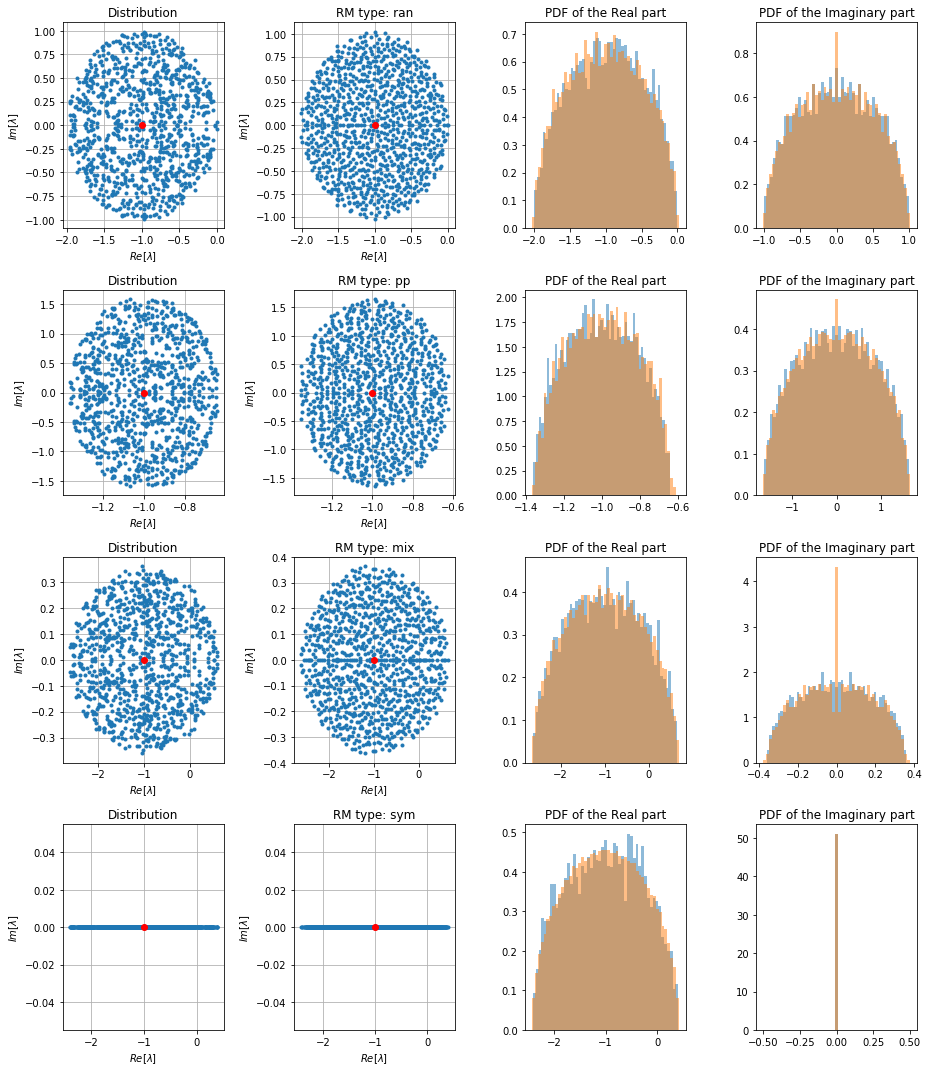

In [7]:
funct = [Class.ran_matrix, Class.pp_matrix, Class.mix_matrix, Class.sym_matrix]
symm = ['no','no','no','yes']
mat = ['ran','pp','mix','sym']

fig, ax = plt.subplots(sharey=True)
fig = plt.gcf()
fig.set_size_inches(13,15)

for i in range(4):

    funct[i]()
    evl  = comp_eig(Class.M,symm=symm[i])
    evl1 = Class.generate_eigenvalues(mat=mat[i])
    
    plt.subplot(4,4,4*i+1)
    plt.plot(evl1.real, evl1.imag,'.')
    plt.plot(-d,0,'or')
    plt.xlabel(f'$Re[\lambda]$')
    plt.ylabel(f'$Im[\lambda]$')
    plt.title("Distribution")
    plt.grid()

    plt.subplot(4,4,4*i+2)
    plt.plot(evl.real, evl.imag,'.')
    plt.plot(-d,0,'or')
    plt.xlabel(f'$Re[\lambda]$')
    plt.ylabel(f'$Im[\lambda]$')
    plt.title("RM type: " + mat[i])
    plt.grid()

    evl, evl1 = [], []
    for j in range(10):
        funct[i]()
        evl  += list(comp_eig(Class.M,symm=symm[i]))
        evl1 += list(Class.generate_eigenvalues(mat=mat[i]))
    evl = np.asarray(evl)
    evl1 = np.asarray(evl1)
    plt.subplot(4,4,4*i+3)
    plt.hist(evl1.real,bins=51,density=True, alpha=0.5)
    plt.hist(evl.real,bins=51,density=True, alpha=0.5)
    plt.title('PDF of the Real part')
    plt.subplot(4,4,4*i+4)
    plt.hist(evl1.imag,bins=51,density=True, alpha=0.5)
    plt.hist(evl.imag,bins=51,density=True, alpha=0.5)
    plt.title('PDF of the Imaginary part')

fig.tight_layout()
plt.show(fig)

### Eigenvalues of a Random matrix with S = 100

In [9]:
evl = []
Evl = []
Class = RMG(100,1,0,0,0.1)
for i in range(10000):
    if i%1000 == 0: print(i)
    Class.ran_matrix()
    evl += list(LA.eigvals(Class.M))
    Evl += list(Class.generate_eigenvalues(mat='ran'))
evl = np.asarray(evl)
Evl = np.asarray(Evl)

rr = abs(evl)
phase = np.arctan(evl.imag/evl.real)
Rr = abs(Evl)
Phase = np.arctan(Evl.imag/Evl.real)

0
1000
2000
3000
4000
5000
6000
7000
8000
9000


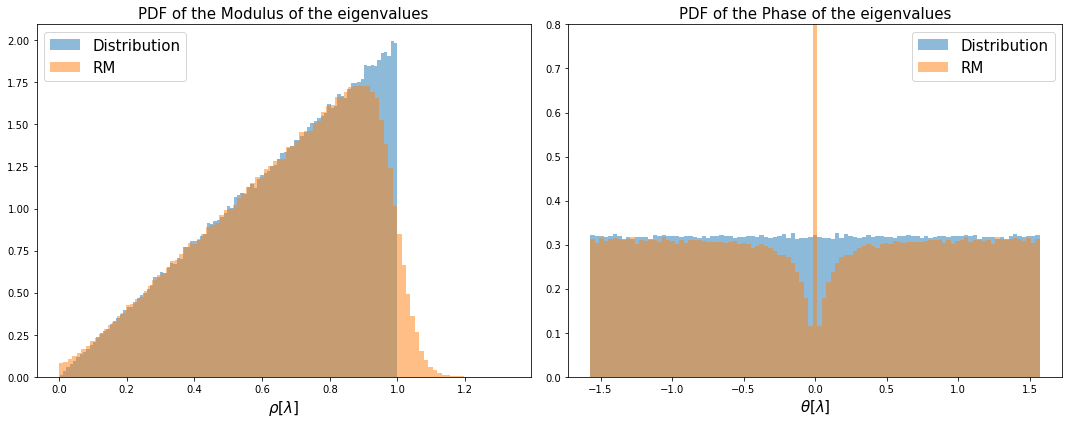

In [19]:
fig, ax = plt.subplots(sharey=True)
fig = plt.gcf()
fig.set_size_inches(15,6)

plt.subplot(1,2,1)
plt.hist(Rr,bins=101,density=True, alpha=0.5,label='Distribution')
plt.hist(rr,bins=101,density=True, alpha=0.5,label='RM')
plt.title('PDF of the Modulus of the eigenvalues',fontsize=15)
plt.xlabel(r'$\rho [\lambda]$',fontsize=15)
plt.legend(fontsize=15)
plt.subplot(1,2,2)
plt.hist(Phase,bins=101,density=True, alpha=0.5,label='Distribution')
plt.hist(phase,bins=101,density=True, alpha=0.5,label='RM')
plt.ylim(0,0.8)
plt.title('PDF of the Phase of the eigenvalues',fontsize=15)
plt.xlabel(r'$\theta [\lambda]$',fontsize=15)
plt.legend(fontsize=15)
'''
plt.subplot(2,2,3)
plt.hist(Evl.real,bins=101,density=True, alpha=0.5,label='Distribution')
plt.hist(evl.real,bins=101,density=True, alpha=0.5,label='RM')
plt.title('PDF of the Real part')
plt.legend()
plt.subplot(2,2,4)
plt.hist(Evl.imag,bins=101,density=True, alpha=0.5,label='Distribution')
plt.hist(evl.imag,bins=101,density=True, alpha=0.5,label='RM')
plt.title('PDF of the Imaginary part')
plt.legend()
'''

fig.tight_layout()
plt.show(fig)

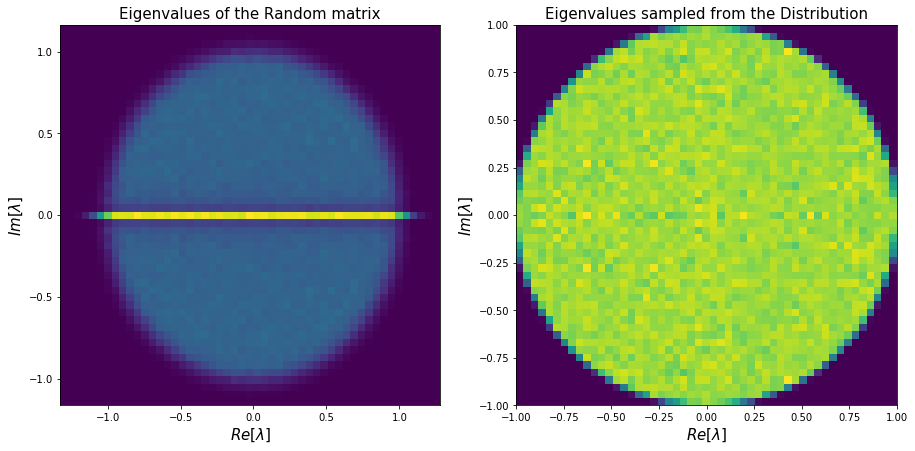

In [18]:
fig, axes = plt.subplots(sharey=True)
fig = plt.gcf()
fig.set_size_inches(15,7)

plt.subplot(1,2,1)
plt.hist2d(evl.real,evl.imag,bins=[51,51])
plt.xlabel(f'$Re[\lambda]$',fontsize=15)
plt.ylabel(f'$Im[\lambda]$',fontsize=15)
plt.title('Eigenvalues of the Random matrix',fontsize=15)
plt.subplot(1,2,2)
plt.hist2d(Evl.real,Evl.imag,bins=[51,51])
plt.xlabel(f'$Re[\lambda]$',fontsize=15)
plt.ylabel(f'$Im[\lambda]$',fontsize=15)
plt.title('Eigenvalues sampled from the Distribution',fontsize=15)

plt.show()

### Eigenvalues of a Random matrix with S = 1000

In [10]:
evl = []
Evl = []
Class = RMG(1000,1,0,0,0.1/np.sqrt(10))
for i in range(100):
    Class.ran_matrix()
    evl += list(LA.eigvals(Class.M))
    Evl += list(Class.generate_eigenvalues(mat='ran'))
evl = np.asarray(evl)
Evl = np.asarray(Evl)

rr = abs(evl)
phase = np.arctan(evl.imag/evl.real)
Rr = abs(Evl)
Phase = np.arctan(Evl.imag/Evl.real)

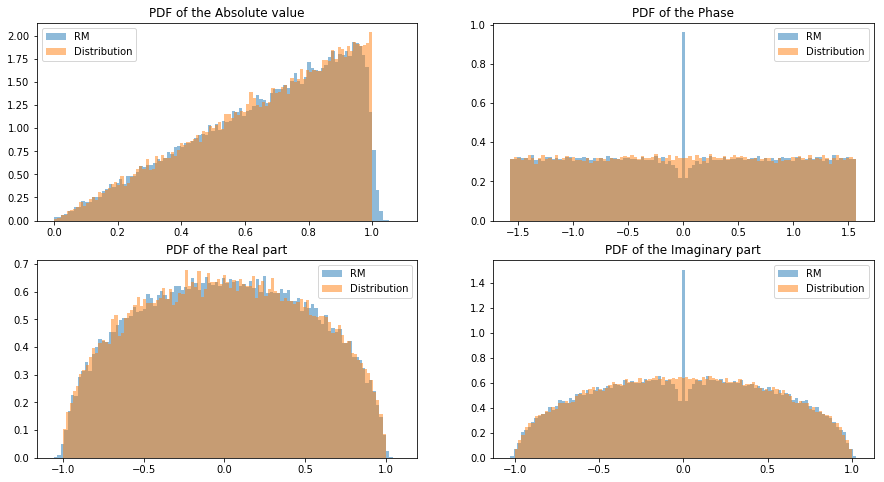

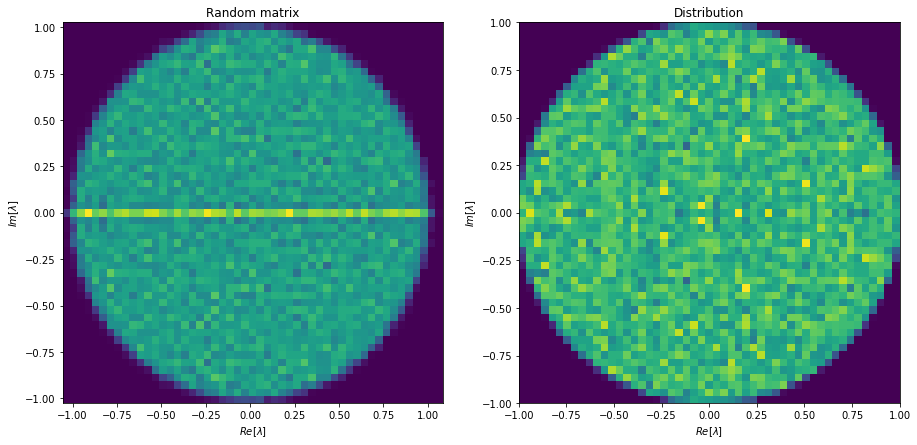

In [11]:
fig, ax = plt.subplots(sharey=True)
fig = plt.gcf()
fig.set_size_inches(15,8)

plt.subplot(2,2,1)
plt.hist(rr,bins=101,density=True, alpha=0.5,label='RM')
plt.hist(Rr,bins=101,density=True, alpha=0.5,label='Distribution')
plt.title('PDF of the Absolute value')
plt.legend()
plt.subplot(2,2,2)
plt.hist(phase,bins=101,density=True, alpha=0.5,label='RM')
plt.hist(Phase,bins=101,density=True, alpha=0.5,label='Distribution')
plt.title('PDF of the Phase')
plt.legend()
plt.subplot(2,2,3)
plt.hist(evl.real,bins=101,density=True, alpha=0.5,label='RM')
plt.hist(Evl.real,bins=101,density=True, alpha=0.5,label='Distribution')
plt.title('PDF of the Real part')
plt.legend()
plt.subplot(2,2,4)
plt.hist(evl.imag,bins=101,density=True, alpha=0.5,label='RM')
plt.hist(Evl.imag,bins=101,density=True, alpha=0.5,label='Distribution')
plt.title('PDF of the Imaginary part')
plt.legend()
plt.show()

fig, axes = plt.subplots(sharey=True)
fig = plt.gcf()
fig.set_size_inches(15,7)

plt.subplot(1,2,1)
plt.hist2d(evl.real,evl.imag,bins=[51,51])
plt.xlabel(f'$Re[\lambda]$')
plt.ylabel(f'$Im[\lambda]$')
plt.title('Random matrix')
plt.subplot(1,2,2)
plt.hist2d(Evl.real,Evl.imag,bins=[51,51])
plt.xlabel(f'$Re[\lambda]$')
plt.ylabel(f'$Im[\lambda]$')
plt.title('Distribution')

plt.show()

## Approximations of $W(z)$

/home/damiano/.local/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
<ipython-input-15-a6f7c2ba8f38>:12: RuntimeWarning: invalid value encountered in log
  plt.plot(x,np.log(x)-np.log(np.log(x)),label='2nd ord. approx.')
<ipython-input-15-a6f7c2ba8f38>:13: RuntimeWarning: invalid value encountered in log
  plt.plot(x,np.log(x)-np.log(np.log(x))+np.log(np.log(x))/np.log(x),label='3rd ord. approx.')
/home/damiano/.local/lib/python3.8/site-packages/matplotlib/transforms.py:2802: ComplexWarning: Casting complex values to real discards the imaginary part
  vmin, vmax = map(float, [vmin, vmax])
/home/damiano/.local/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


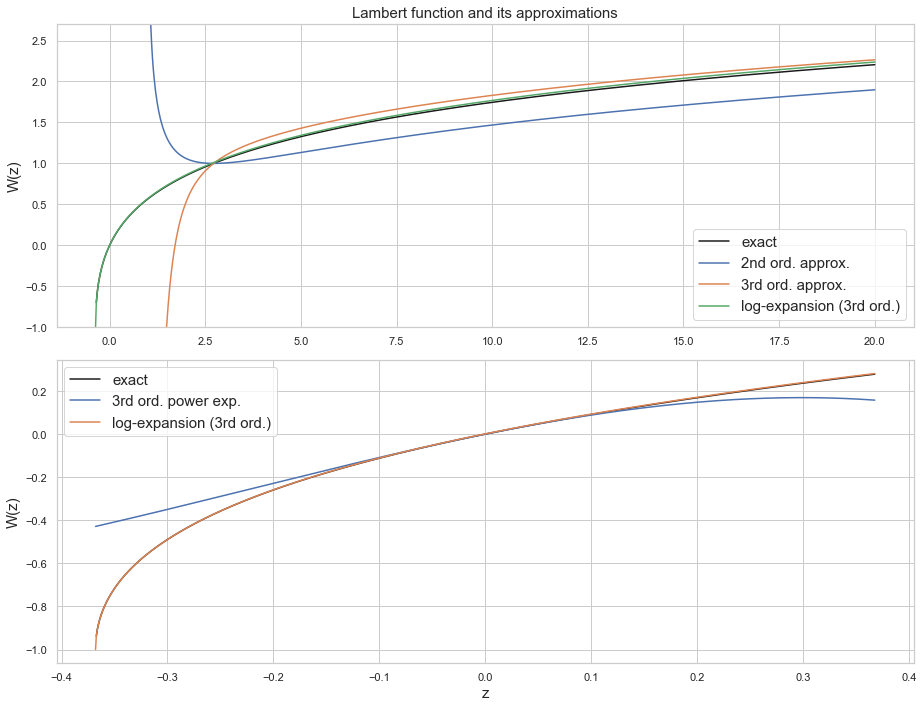

In [15]:
fig, ax = plt.subplots(sharey=True)
fig = plt.gcf()
fig.set_size_inches(13,10)

plt.subplot(2,1,1)
x=np.linspace(-1/np.e,20,1000)
y = sp.special.lambertw(x)
phi = np.log(1+np.sqrt(2*np.e*(x+1/np.e)))
func = -1+phi+phi**2/6-phi**3/72

plt.plot(x,y,'-k',label='exact')
plt.plot(x,np.log(x)-np.log(np.log(x)),label='2nd ord. approx.')
plt.plot(x,np.log(x)-np.log(np.log(x))+np.log(np.log(x))/np.log(x),label='3rd ord. approx.')
plt.plot(x,func,label='log-expansion (3rd ord.)')
plt.ylim(-1,y[-1]+0.5)
plt.title('Lambert function and its approximations',fontsize=15)
plt.ylabel('W(z)',fontsize=15)
plt.legend(fontsize=15)


plt.subplot(2,1,2)
x=np.linspace(-1/np.e,1/np.e,1000)
y = sp.special.lambertw(x)
phi = np.log(1+np.sqrt(2*np.e*(x+1/np.e)))
func = -1+phi+phi**2/6-phi**3/72

plt.plot(x,y,'-k',label='exact')
plt.plot(x,x-x**2-1.5*x**3,label='3rd ord. power exp.')
plt.plot(x,func,label='log-expansion (3rd ord.)')
plt.ylabel('W(z)',fontsize=15)
plt.xlabel('z',fontsize=15)
plt.legend(fontsize=15)

fig.tight_layout()
plt.show(fig)

<ipython-input-16-d65f1f30c843>:11: RuntimeWarning: divide by zero encountered in log
  plt.plot(x,abs(-1+(np.log(x)-np.log(np.log(x)))/y),label='2nd ord. approx.')
<ipython-input-16-d65f1f30c843>:11: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(x,abs(-1+(np.log(x)-np.log(np.log(x)))/y),label='2nd ord. approx.')
<ipython-input-16-d65f1f30c843>:12: RuntimeWarning: divide by zero encountered in log
  plt.plot(x,abs(-1+(np.log(x)-np.log(np.log(x))+np.log(np.log(x))/np.log(x))/y),label='3rd ord. approx.')
<ipython-input-16-d65f1f30c843>:12: RuntimeWarning: invalid value encountered in add
  plt.plot(x,abs(-1+(np.log(x)-np.log(np.log(x))+np.log(np.log(x))/np.log(x))/y),label='3rd ord. approx.')
<ipython-input-16-d65f1f30c843>:27: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(x,abs(-1+(x-x**2-1.5*x**3)/y),label='3rd ord. power exp.')
<ipython-input-16-d65f1f30c843>:28: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(x,abs(-1+fu

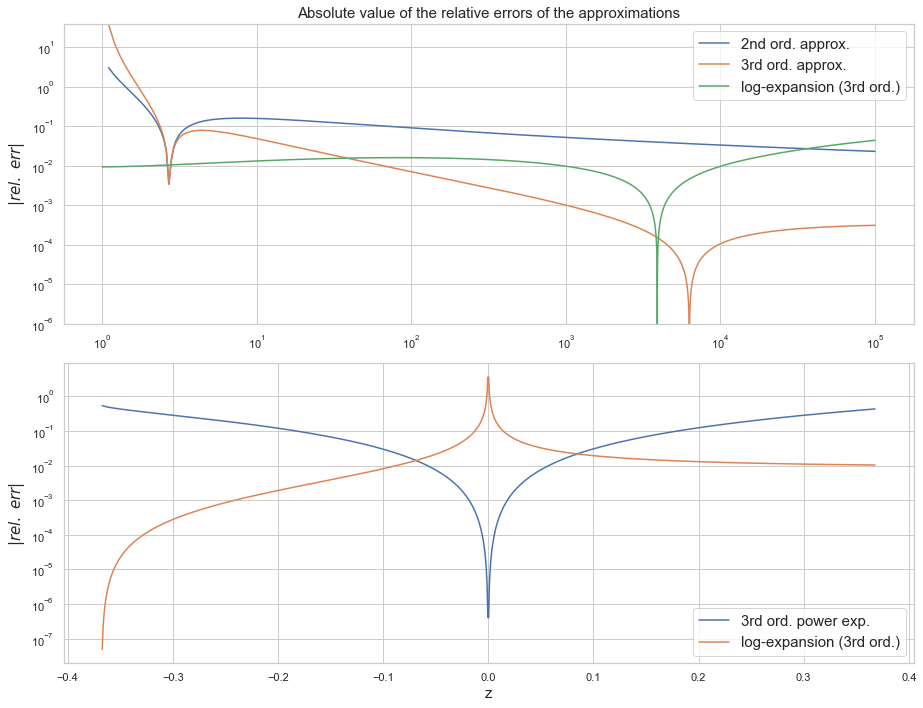

In [16]:
fig, ax = plt.subplots(sharey=True)
fig = plt.gcf()
fig.set_size_inches(13,10)

plt.subplot(2,1,1)
x=np.linspace(1,10**5,10**6)
y = sp.special.lambertw(x)
phi = np.log(1+np.sqrt(2*np.e*(x+1/np.e)))
func = -1+phi+phi**2/6-phi**3/72

plt.plot(x,abs(-1+(np.log(x)-np.log(np.log(x)))/y),label='2nd ord. approx.')
plt.plot(x,abs(-1+(np.log(x)-np.log(np.log(x))+np.log(np.log(x))/np.log(x))/y),label='3rd ord. approx.')
plt.plot(x,abs(-1+func/y),label='log-expansion (3rd ord.)')
plt.ylim(bottom=10**(-6))
plt.yscale('log')
plt.xscale('log')
plt.title('Absolute value of the relative errors of the approximations',fontsize=15)
plt.ylabel(r'$|rel.\ err|$',fontsize=15)
plt.legend(fontsize=15)

plt.subplot(2,1,2)
x=np.linspace(-1/np.e,1/np.e,1000)
y = sp.special.lambertw(x)
phi = np.log(1+np.sqrt(2*np.e*(x+1/np.e)))
func =  -1+phi+phi**2/6-phi**3/72

plt.plot(x,abs(-1+(x-x**2-1.5*x**3)/y),label='3rd ord. power exp.')
plt.plot(x,abs(-1+func/y),label='log-expansion (3rd ord.)')
plt.yscale('log')
plt.ylabel(r'$|rel.\ err|$',fontsize=15)
plt.xlabel('z',fontsize=15)
plt.legend(fontsize=15)

fig.tight_layout()
plt.show(fig)

# Eigenvalues of the system at different delays T (LSA)

Here we want to study the eigenvalue equation given by the Linear Stability Analysis of the system near the equilibrium:

$$\lambda\ =\ a\ +\ \frac{1}{T}W\big(b T \exp (-a T)\big)$$

.

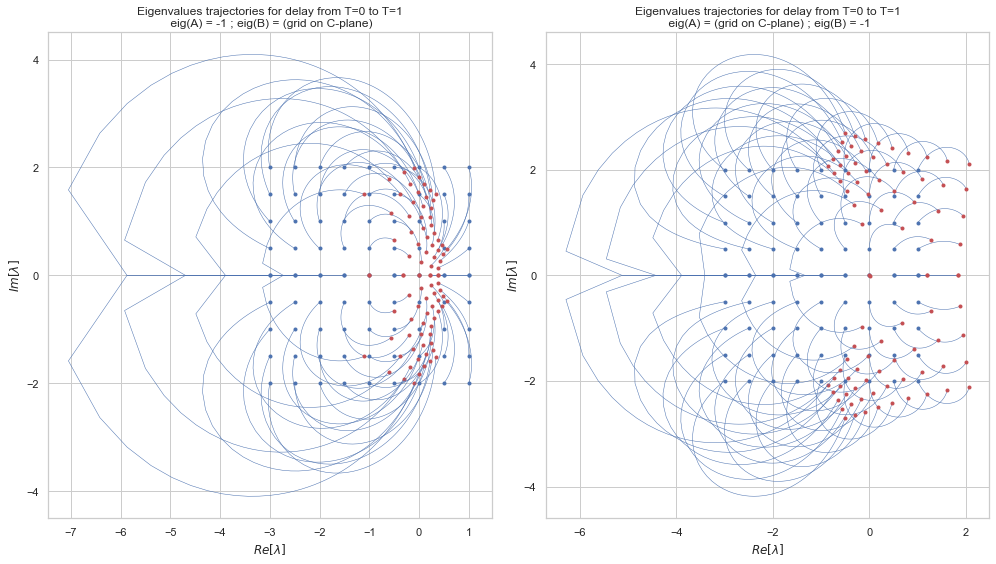

In [17]:
T = np.linspace(0.0001,1.0001,100)
X = np.linspace(-2,2,9)

fig, ax = plt.subplots(sharey=True)
fig = plt.gcf()
fig.set_size_inches(14,8)

plt.subplot(1,2,1)
fr = []
fi = []
for x in X:
    for y in X:
        evlA = -1
        evlB = x+1.j*y
        f = lambda_funct (evlA,evlB,T)
        plt.plot(f.real,f.imag, 'b-', linewidth=0.5)
        plt.plot(f.real[0],f.imag[0],'b.')
        fr +=[f.real[-1]]
        fi +=[f.imag[-1]]
    f = lambda_funct (evlA,x-1.j*10**(-5),T)
    plt.plot(f.real,f.imag, 'b-', linewidth=0.5)
    plt.plot(f.real[0],f.imag[0],'b.')
    plt.plot(f.real[-1],f.imag[-1],'r.')
plt.plot(fr,fi,'r.')

plt.xlabel(r'$Re[\lambda]$')
plt.ylabel(r'$Im[\lambda]$')
plt.title(f"Eigenvalues trajectories for delay from T=0 to T=1\n eig(A) = -1 ; eig(B) = (grid on C-plane)")

plt.subplot(1,2,2)
fr = []
fi = []
for x in X:
    for y in X:
        evlA = -1
        evlB = x+1.j*y
        f = lambda_funct (evlB,evlA,T)
        plt.plot(f.real,f.imag, 'b-', linewidth=0.5)
        plt.plot(f.real[0],f.imag[0],'b.')
        fr +=[f.real[-1]]
        fi +=[f.imag[-1]]
    f = lambda_funct (x-1.j*10**(-5),evlA,T)
    plt.plot(f.real,f.imag, 'b-', linewidth=0.5)
    plt.plot(f.real[0],f.imag[0],'b.')
    plt.plot(f.real[-1],f.imag[-1],'r.')
plt.plot(fr,fi,'r.')
    
plt.xlabel(r'$Re[\lambda]$')
plt.ylabel(r'$Im[\lambda]$')
plt.title(f"Eigenvalues trajectories for delay from T=0 to T=1\n eig(A) = (grid on C-plane) ; eig(B) = -1")

fig.tight_layout()
plt.show(fig)

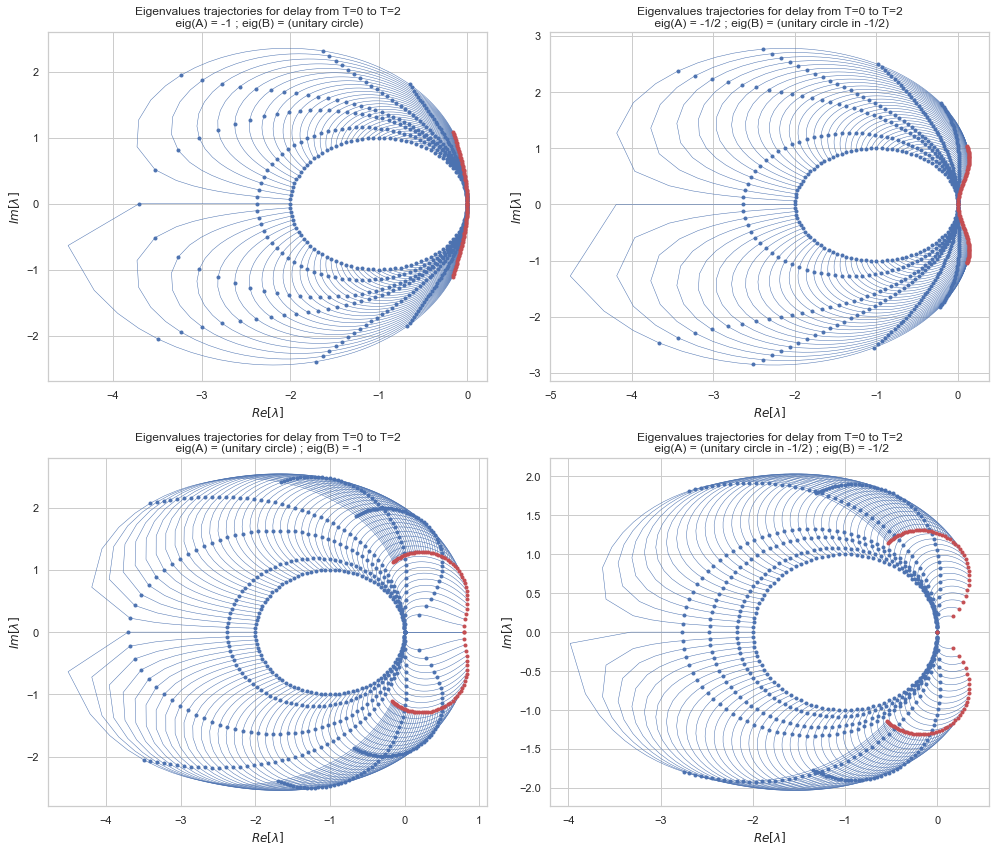

In [24]:
T = np.linspace(0.0001,2.0001,150)
X = np.linspace(-2,2,10)
Th = np.linspace(0,2*np.pi,101)

fig, ax = plt.subplots(sharey=True)
fig = plt.gcf()
fig.set_size_inches(14,12)

plt.subplot(2,2,1)
fr = []
fi = []
for t in Th:
    evlA = -1
    evlB = np.exp(1.j*t)
    f = lambda_funct (evlA,evlB,T)
    plt.plot(f.real,f.imag, 'b-', linewidth=0.5, label=f'a = {evlA} and b = {evlB}')
    plt.plot(f.real[0],f.imag[0],'b.')
    for i in [10,20,25,40,70]:
        plt.plot(f.real[i],f.imag[i],'b.')
    fr +=[f.real[-1]]
    fi +=[f.imag[-1]]
plt.plot(fr,fi,'r.')
    
plt.xlabel(r'$Re[\lambda]$')
plt.ylabel(r'$Im[\lambda]$')
plt.title(f"Eigenvalues trajectories for delay from T=0 to T=2\n eig(A) = -1 ; eig(B) = (unitary circle)")

plt.subplot(2,2,2)
fr = []
fi = []
for t in Th:
    evlA = -0.5
    evlB = np.exp(1.j*t)-0.5
    f = lambda_funct (evlA,evlB,T)
    plt.plot(f.real,f.imag, 'b-', linewidth=0.5, label=f'a = {evlA} and b = {evlB}')
    plt.plot(f.real[0],f.imag[0],'b.')
    for i in [10,20,25,40,70]:
        plt.plot(f.real[i],f.imag[i],'b.')
    fr +=[f.real[-1]]
    fi +=[f.imag[-1]]
plt.plot(fr,fi,'r.')
    
plt.xlabel(r'$Re[\lambda]$')
plt.ylabel(r'$Im[\lambda]$')
plt.title(f"Eigenvalues trajectories for delay from T=0 to T=2\n eig(A) = -1/2 ; eig(B) = (unitary circle in -1/2)")

plt.subplot(2,2,3)
fr = []
fi = []
for t in Th:
    evlA = -1
    evlB = np.exp(1.j*t)
    f = lambda_funct (evlB,evlA,T)
    plt.plot(f.real,f.imag, 'b-', linewidth=0.5, label=f'a = {evlA} and b = {evlB}')
    plt.plot(f.real[0],f.imag[0],'b.')
    for i in [10,20,25,40,70]:
        plt.plot(f.real[i],f.imag[i],'b.')
    fr +=[f.real[-1]]
    fi +=[f.imag[-1]]
plt.plot(fr,fi,'r.')
    
plt.xlabel(r'$Re[\lambda]$')
plt.ylabel(r'$Im[\lambda]$')
plt.title(f"Eigenvalues trajectories for delay from T=0 to T=2\n eig(A) = (unitary circle) ; eig(B) = -1")

plt.subplot(2,2,4)
fr = []
fi = []
for t in Th:
    evlA = -0.5
    evlB = np.exp(1.j*t)-0.5
    f = lambda_funct (evlB,evlA,T)
    plt.plot(f.real,f.imag, 'b-', linewidth=0.5, label=f'a = {evlA} and b = {evlB}')
    plt.plot(f.real[0],f.imag[0],'b.')
    for i in [10,20,25,40,70]:
        plt.plot(f.real[i],f.imag[i],'b.')
    fr +=[f.real[-1]]
    fi +=[f.imag[-1]]
plt.plot(fr,fi,'r.')
    
plt.xlabel(r'$Re[\lambda]$')
plt.ylabel(r'$Im[\lambda]$')
plt.title(f"Eigenvalues trajectories for delay from T=0 to T=2\n eig(A) = (unitary circle in -1/2) ; eig(B) = -1/2")

fig.tight_layout()
plt.show(fig)

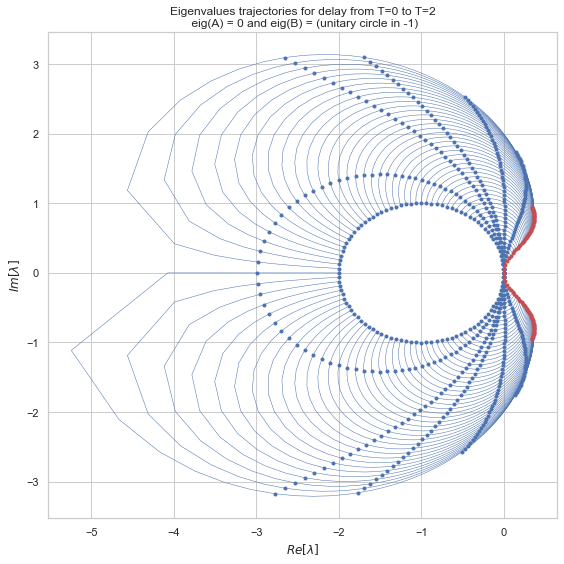

In [23]:
T = np.linspace(0.0001,2.0001,150)
Th = np.linspace(0,2*np.pi,101)

fig, ax = plt.subplots(sharey=True)
fig = plt.gcf()
fig.set_size_inches(8,8)

fr = []
fi = []
for t in Th:
    evlA = 0
    evlB = -1 + np.exp(1.j*t)
    f = lambda_funct (evlA,evlB,T)
    plt.plot(f.real,f.imag, 'b-', linewidth=0.5, label=f'a = {evlA} and b = {evlB}')
    plt.plot(f.real[0],f.imag[0],'b.')
    for i in [10,20,25,40,70]:
        plt.plot(f.real[i],f.imag[i],'b.')
    fr +=[f.real[-1]]
    fi +=[f.imag[-1]]
plt.plot(fr,fi,'r.')
    
plt.xlabel(r'$Re[\lambda]$')
plt.ylabel(r'$Im[\lambda]$')
plt.title(f"Eigenvalues trajectories for delay from T=0 to T=2\n eig(A) = 0 and eig(B) = (unitary circle in -1)")
#plt.legend()

fig.tight_layout()
plt.show(fig)

### Real part of Eigenvalues for fixed T and Separatrix stability/instability

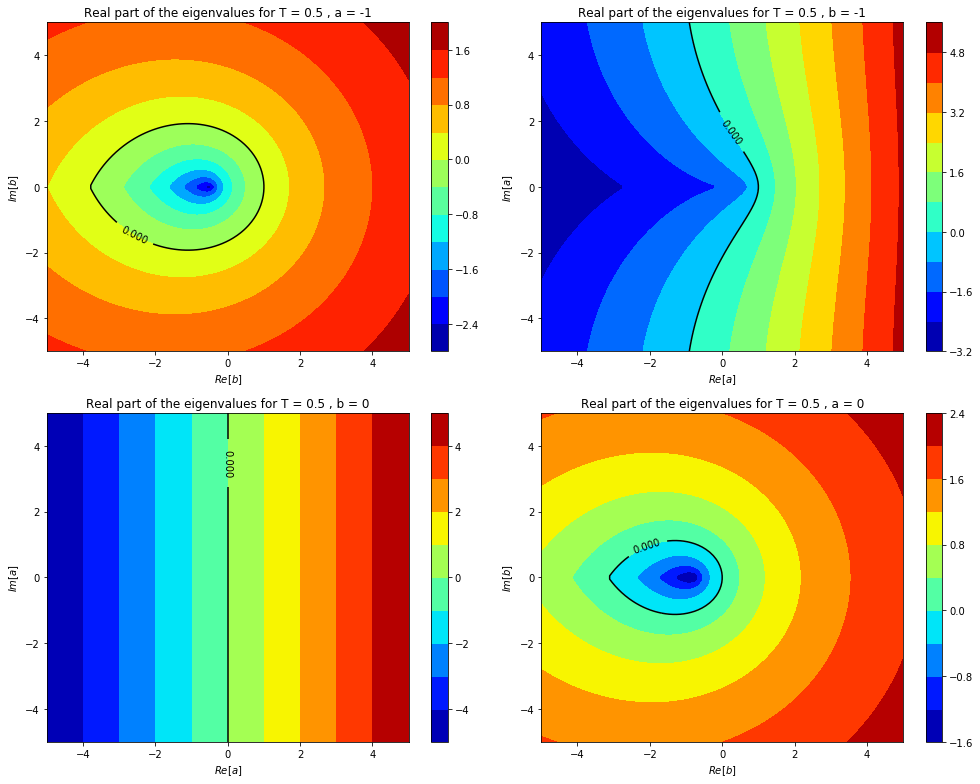

In [49]:
b_vals = np.linspace(-5,5,100)
T = 0.5
a = -1

L_max = np.zeros((len(b_vals),len(b_vals),4))

for i,x in enumerate(b_vals):
    for j,y in enumerate(b_vals):
        evlB = x + 1.j*y
        f = lambda_funct (a,evlB,T)
        L_max[i,j,0] = f.real
        f = lambda_funct (evlB,a,T)
        L_max[i,j,1] = f.real
        f = lambda_funct (evlB,0,T)
        L_max[i,j,2] = f.real
        f = lambda_funct (0,evlB,T)
        L_max[i,j,3] = f.real

        
fig, ax = plt.subplots(sharey=True)
fig = plt.gcf()
fig.set_size_inches(14,11)

plt.subplot(2,2,1)
contours = plt.contour(b_vals, b_vals, L_max[:,:,0].T, [0], colors='black')
plt.clabel(contours, inline=True, fontsize=10)
plt.contourf(b_vals, b_vals, L_max[:,:,0].T, 10, cmap='jet')
#plt.imshow(L_max[:,:,0].T, extent=[b_vals[0], b_vals[-1], b_vals[0], b_vals[-1]], origin='lower',cmap='jet', alpha=0.5)
plt.colorbar()
plt.axis(aspect='image')
plt.xlabel(f'$Re[b]$')
plt.ylabel(f'$Im[b]$')
plt.title(f"Real part of the eigenvalues for T = {T} , a = {a}")
#plt.grid()

plt.subplot(2,2,2)
contours = plt.contour(b_vals, b_vals, L_max[:,:,1].T, [0], colors='black')
plt.clabel(contours, inline=True, fontsize=10)
plt.contourf(b_vals, b_vals, L_max[:,:,1].T, 10, cmap='jet')
#plt.imshow(L_max[:,:,1].T, extent=[b_vals[0], b_vals[-1], b_vals[0], b_vals[-1]], origin='lower',cmap='jet', alpha=0.5)
plt.colorbar()
plt.axis(aspect='image')
plt.xlabel(f'$Re[a]$')
plt.ylabel(f'$Im[a]$')
plt.title(f"Real part of the eigenvalues for T = {T} , b = {a}")
#plt.grid()

plt.subplot(2,2,3)
contours = plt.contour(b_vals, b_vals, L_max[:,:,2].T, [0], colors='black')
plt.clabel(contours, inline=True, fontsize=10)
plt.contourf(b_vals, b_vals, L_max[:,:,2].T, 10, cmap='jet')
#plt.imshow(L_max[:,:,1].T, extent=[b_vals[0], b_vals[-1], b_vals[0], b_vals[-1]], origin='lower',cmap='jet', alpha=0.5)
plt.colorbar()
plt.axis(aspect='image')
plt.xlabel(f'$Re[a]$')
plt.ylabel(f'$Im[a]$')
plt.title(f"Real part of the eigenvalues for T = {T} , b = {0}")
#plt.grid()

plt.subplot(2,2,4)
contours = plt.contour(b_vals, b_vals, L_max[:,:,3].T, [0], colors='black')
plt.clabel(contours, inline=True, fontsize=10)
plt.contourf(b_vals, b_vals, L_max[:,:,3].T, 10, cmap='jet')
#plt.imshow(L_max[:,:,1].T, extent=[b_vals[0], b_vals[-1], b_vals[0], b_vals[-1]], origin='lower',cmap='jet', alpha=0.5)
plt.colorbar()
plt.axis(aspect='image')
plt.xlabel(f'$Re[b]$')
plt.ylabel(f'$Im[b]$')
plt.title(f"Real part of the eigenvalues for T = {T} , a = {0}")
#plt.grid()

fig.tight_layout()
plt.show(fig)

## Maximal value of delay for which the system is stable (Stability Range for different T)

In [8]:
b_vals = np.linspace(-2,2,800)
a_vals = np.linspace(-2,2,800)
T = 10**np.linspace(np.log10(0.1),np.log10(100.1),201)#np.linspace(0.0001,100.0001,201)

t_max = np.zeros((len(a_vals),len(b_vals)))
t_min = np.zeros((len(a_vals),len(b_vals)))

for i,evlA in enumerate(a_vals):
    for j,evlB in enumerate(b_vals):
        f = lambda_funct (evlA,evlB,T)
        ind = f.real <= 0
        t = T[ind]
        if t.size != 0:
            t_max[i,j] = t[-1]
            t_min[i,j] += t[0]/100

In [9]:
import seaborn as sns
#sns.set_theme()
sns.set_style("whitegrid")
sns.set_context("talk", font_scale = 0.8, rc={"grid.linewidth": 0.4})
#sns.plotting_context()

In [10]:
from matplotlib.colors import LogNorm

In [11]:
t_max = t_max+0.0001

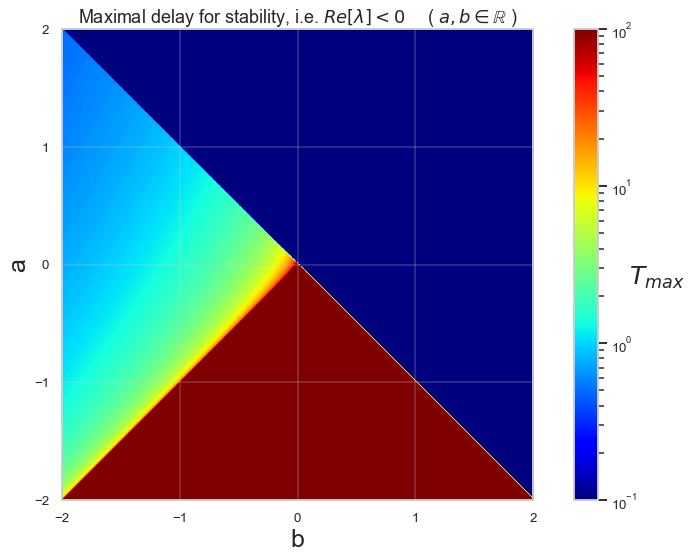

In [14]:
fig, ax = plt.subplots(sharey=True)
fig = plt.gcf()
fig.set_size_inches(12,8)

#plt.contourf(b_vals, b_vals, t_max, 100, cmap='jet')
plt.imshow(t_max, extent=[b_vals[0], b_vals[-1], a_vals[0],a_vals[-1]],
           norm=LogNorm(vmin=T[0], vmax=T[-1]), origin='lower',cmap='jet')
clb = plt.colorbar()
clb.ax.set_ylabel(r'$T_{max}$',rotation=0,labelpad=20,fontsize=25)
#contours = plt.contour(b_vals, a_vals, t_max, [1,2,100],linewidths=0.7,colors='black')
#plt.clabel(contours, inline=True, fmt='%1.1f', colors='k', fontsize=13)
#plt.axis(aspect='image')
plt.locator_params(nbins=5)
plt.xlabel('b',fontsize=25)
plt.ylabel('a',fontsize=25)
plt.title(r"Maximal delay for stability, i.e. $Re[\lambda]<0$ $\quad$( $a,b \in \mathbb{R}$ )",fontsize=18)
#plt.grid()

fig.tight_layout()
plt.show(fig)

fig.savefig('final_figures/theory_upper_triang.png',format='png')

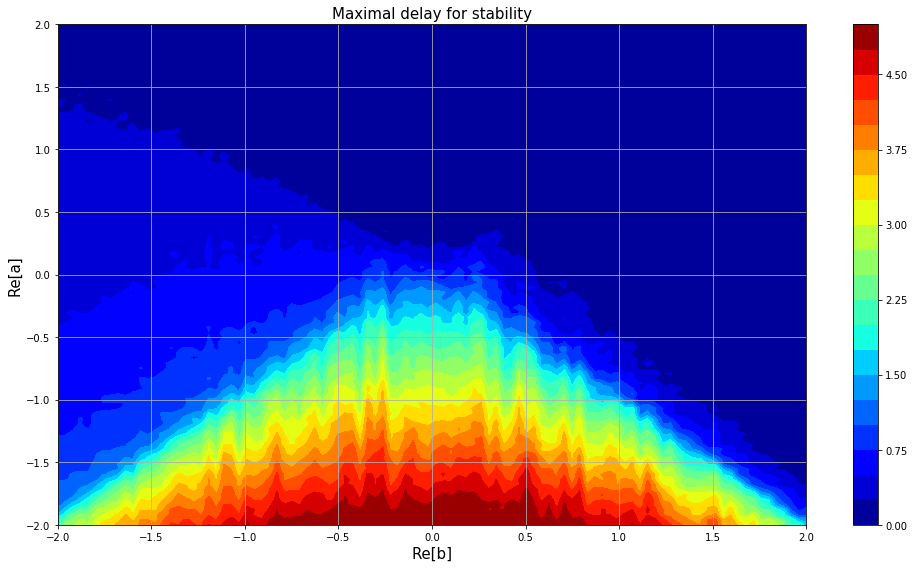

In [7]:
T = np.linspace(0.0001,5,100)
t_max = np.zeros((100,100))
t_min = np.zeros((100,100))

for k in range(100):
    a_vals = np.linspace(-2,2,100) + 1.j*rd.uniform(-2,2,100)
    b_vals = np.linspace(-2,2,100) + 1.j*rd.uniform(-2,2,100)
    for i,evlA in enumerate(a_vals):
        for j,evlB in enumerate(b_vals):
            f = lambda_funct (evlA,evlB,T)
            ind = f.real <= 0
            t = T[ind]
            if t.size != 0:
                t_max[i,j] += t[-1]/100
                t_min[i,j] += t[0]/100
                
b_vals = np.linspace(-2,2,100)

fig, ax = plt.subplots(sharey=True)
fig = plt.gcf()
fig.set_size_inches(14,8)

#contours = plt.contour(b_vals, b_vals, t_max, 5, colors='black')
#plt.clabel(contours, inline=True, fontsize=10)
plt.contourf(b_vals, b_vals, t_max, 20, cmap='jet')
#plt.imshow(t_max, extent=[b_vals[0], b_vals[-1], b_vals[0], b_vals[-1]], origin='lower',cmap='jet')
plt.colorbar()
plt.axis(aspect='image')
plt.xlabel('Re[b]',fontsize=15)
plt.ylabel('Re[a]',fontsize=15)
plt.title(f"Maximal delay for stability",fontsize=15)#(a,b are Real values with random imaginary part)
plt.grid()

fig.tight_layout()
plt.show(fig)

In [15]:
T = 10**np.linspace(np.log10(0.01),np.log10(100.01),201)
#T = np.linspace(0.0001,5,100)
t_max = np.zeros((400,400,2))
b1_vals = np.linspace(-2.5,1.5,400)
b2_vals = np.linspace(-2,2,400)

for i,x in enumerate(b1_vals):
    if i%40 == 0:
        print(i/4,'%')
    for j,y in enumerate(b2_vals):
        evlB = x + 1.j*y
        f = lambda_funct (-1,evlB,T)
        ind = f.real <= 0
        t = T[ind]
        if t.size != 0:
            t_max[i,j,0] = t[-1]

0.0 %
10.0 %
20.0 %
30.0 %
40.0 %
50.0 %
60.0 %
70.0 %
80.0 %
90.0 %


In [22]:
#T = np.linspace(0.0001,5,100)
b1_vals1 = np.linspace(-3.5,0.5,400)
b2_vals1 = np.linspace(-2.,2.,400)

for i,x in enumerate(b1_vals1):
    if i%40 == 0:
        print(i/4,'%')
    for j,y in enumerate(b2_vals1):
        evlB = x + 1.j*y
        f = lambda_funct (0,evlB,T)
        ind = f.real <= 0
        t = T[ind]
        if t.size != 0:
            t_max[i,j,1] = t[-1]

0.0 %
10.0 %
20.0 %
30.0 %
40.0 %
50.0 %
60.0 %
70.0 %
80.0 %
90.0 %


In [23]:
t_max = t_max+0.0001

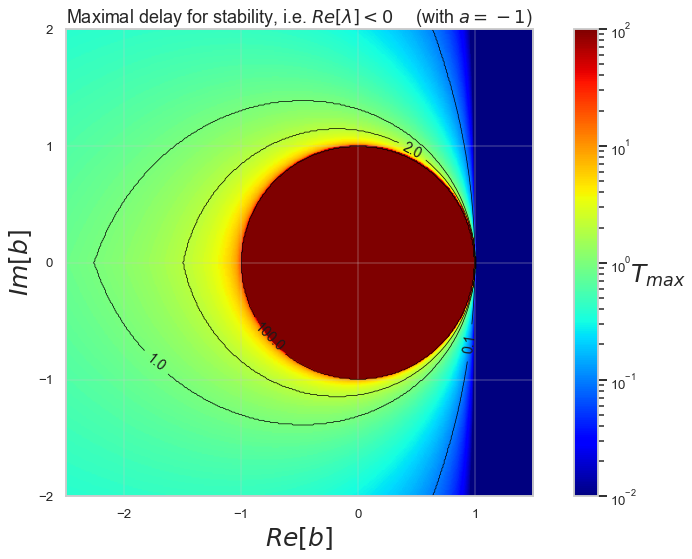

In [20]:
fig, ax = plt.subplots(sharey=True)
fig = plt.gcf()
fig.set_size_inches(12,8)

plt.imshow(t_max[:,:,0].T, extent=[b1_vals[0], b1_vals[-1], b2_vals[0],b2_vals[-1]],
           norm=LogNorm(vmin=T[0], vmax=T[-1]), origin='lower',cmap='jet')
clb = plt.colorbar()
clb.ax.set_ylabel(r'$T_{max}$',rotation=0,labelpad=20,fontsize=25)
contours = plt.contour(b1_vals, b2_vals, t_max[:,:,0].T, [0.1,1,2,100],linewidths=0.7,colors='black')
plt.clabel(contours, inline=True, fmt='%1.1f', colors='k', fontsize=14)
#plt.axis(aspect='image')
plt.locator_params(nbins=5)
plt.xlabel(f'$Re[b]$',fontsize=25)
plt.ylabel(f'$Im[b]$',fontsize=25)
plt.title(r"Maximal delay for stability, i.e. $Re[\lambda]<0$ $\quad$(with $a = -1$)",fontsize=18)
#plt.grid()

fig.tight_layout()
plt.show(fig)

In [21]:
fig.savefig('final_figures/theory_a=1.png',format='png')

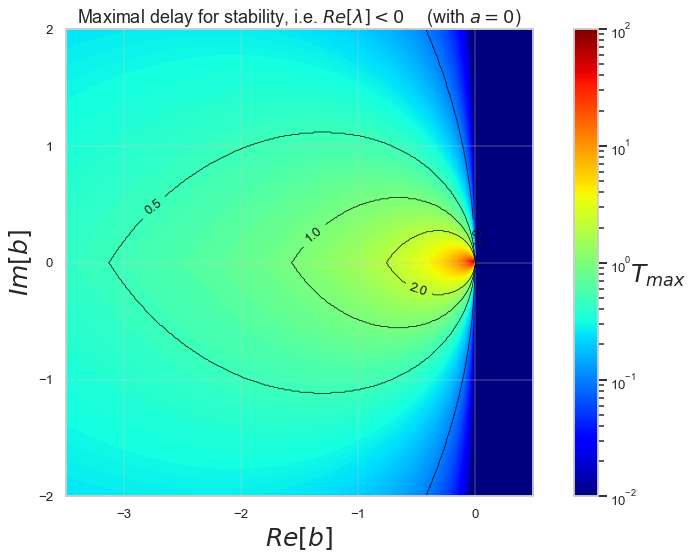

In [24]:
fig, ax = plt.subplots(sharey=True)
fig = plt.gcf()
fig.set_size_inches(12,8)

plt.imshow(t_max[:,:,1].T, extent=[b1_vals1[0], b1_vals1[-1], b2_vals1[0],b2_vals1[-1]],
           norm=LogNorm(vmin=T[0], vmax=T[-1]), origin='lower',cmap='jet')
clb = plt.colorbar()
clb.ax.set_ylabel(r'$T_{max}$',rotation=0,labelpad=20, fontsize=25)
contours = plt.contour(b1_vals1, b2_vals1, t_max[:,:,1].T, [0.1,0.5,1,2],linewidths=0.7,colors='black')
plt.clabel(contours, inline=True, fmt='%1.1f', colors='k', fontsize=13)
#plt.axis(aspect='image')
plt.locator_params(nbins=5)
plt.xlabel(f'$Re[b]$', fontsize=25)
plt.ylabel(f'$Im[b]$', fontsize=25)
plt.title(r"Maximal delay for stability, i.e. $Re[\lambda]<0$ $\quad$(with $a = 0$)", fontsize=18)
#plt.grid()

fig.tight_layout()
plt.show(fig)

In [25]:
fig.savefig('final_figures/theory_a=0.png',format='png')

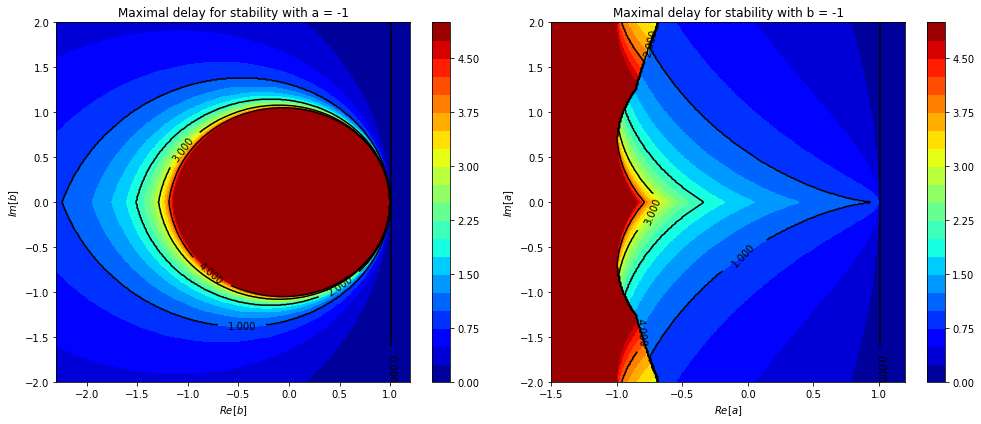

In [23]:
fig, ax = plt.subplots(sharey=True)
fig = plt.gcf()
fig.set_size_inches(14,6)

plt.subplot(1,2,1)
plt.contourf(b1_vals, b_vals, t_max[:,:,0].T, 20, cmap='jet')
plt.colorbar()
contours = plt.contour(b1_vals, b_vals, t_max[:,:,0].T, 5, colors='black')
plt.clabel(contours, inline=True, fontsize=10)
#plt.imshow(t_max[:,:,0].T,extent=[b_vals[0],b_vals[-1],b_vals[0],b_vals[-1]],origin='lower',cmap='jet',alpha=0.7)
plt.axis(aspect='image')
plt.xlabel(f'$Re[b]$')
plt.ylabel(f'$Im[b]$')
plt.title(f"Maximal delay for stability with a = {-1}")
#plt.grid()

plt.subplot(1,2,2)
plt.contourf(b1_vals, b_vals, t_max[:,:,1].T, 20, cmap='jet')
plt.colorbar()
contours = plt.contour(b1_vals, b_vals, t_max[:,:,1].T, 5, colors='black')
plt.clabel(contours, inline=True, fontsize=10)
#plt.imshow(t_max[:,:,1].T,extent=[b_vals[0],b_vals[-1],b_vals[0],b_vals[-1]],origin='lower',cmap='jet',alpha=0.7)
plt.axis(aspect='image')
plt.xlim(-1.5,1.2)
plt.xlabel(f'$Re[a]$')
plt.ylabel(f'$Im[a]$')
plt.title(f"Maximal delay for stability with b = {-1}")
#plt.grid()

fig.tight_layout()
plt.show(fig)

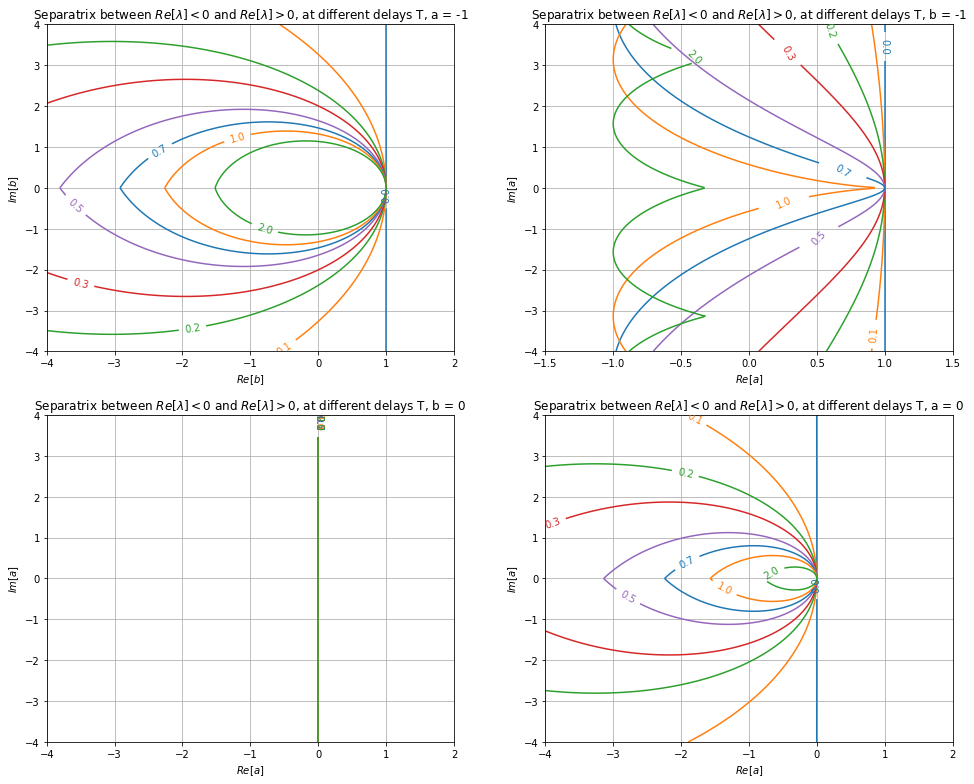

In [16]:
b1_vals = np.linspace(-4,2,300)
b_vals = np.linspace(-4,4,400)
Tvec = [0.0001,0.1,0.2,0.3,0.5,0.7,1.,2.]#np.linspace(0.0001,1.0001,11)
a = -1

L_max = np.zeros((len(b1_vals),len(b_vals),4,len(Tvec)))

for k,T in enumerate(Tvec):
    for i,x in enumerate(b1_vals):
        for j,y in enumerate(b_vals):
            evlB = x + 1.j*y
            f = lambda_funct (a,evlB,T)
            L_max[i,j,0,k] = f.real
            f = lambda_funct (evlB,a,T)
            L_max[i,j,1,k] = f.real
            f = lambda_funct (evlB,0,T)
            L_max[i,j,2,k] = f.real
            f = lambda_funct (0,evlB,T)
            L_max[i,j,3,k] = f.real
        
fig, ax = plt.subplots(sharey=True)
fig = plt.gcf()
fig.set_size_inches(14,11)

cc = ['#1f77b4','#ff7f0e','#2ca02c','#d62728','#9467bd','#1f77b4','#ff7f0e','#2ca02c','#d62728','#9467bd']

plt.subplot(2,2,1)
for k in range(len(Tvec)):
    cs = plt.contour(b1_vals, b_vals, L_max[:,:,0,k].T, [0], colors=cc[k])
    fmt = {}
    strs = [ '{:0.1f}'.format(float(Tvec[k])) ]
    for l,s in zip( cs.levels, strs ):
        fmt[l] = s
    plt.clabel(cs, inline=True, fmt=fmt, inline_spacing=3, fontsize=10)
plt.axis(aspect='image')
plt.xlabel(f'$Re[b]$')
plt.ylabel(f'$Im[b]$')
plt.title(f"Separatrix between $Re [\lambda] < 0$ and $Re [\lambda] > 0$, at different delays T, a = {a}")
plt.grid()

plt.subplot(2,2,2)
for k in range(len(Tvec)):
    cs = plt.contour(b1_vals, b_vals, L_max[:,:,1,k].T, [0], colors=cc[k])
    fmt = {}
    strs = [ '{:0.1f}'.format(float(Tvec[k])) ]
    for l,s in zip( cs.levels, strs ):
        fmt[l] = s
    plt.clabel(cs, inline=True, fmt=fmt, inline_spacing=3, fontsize=10)
plt.axis(aspect='image')
plt.xlim(-1.5,1.5)
plt.xlabel(f'$Re[a]$')
plt.ylabel(f'$Im[a]$')
plt.title(f"Separatrix between $Re [\lambda] < 0$ and $Re [\lambda] > 0$, at different delays T, b = {a}")
plt.grid()

plt.subplot(2,2,3)
for k in range(len(Tvec)):
    cs = plt.contour(b1_vals, b_vals, L_max[:,:,2,k].T, [0], colors=cc[k])
    fmt = {}
    strs = [ '{:0.1f}'.format(float(Tvec[k])) ]
    for l,s in zip( cs.levels, strs ):
        fmt[l] = s
    plt.clabel(cs, inline=True, fmt=fmt, inline_spacing=3, fontsize=10)
plt.axis(aspect='image')
plt.xlabel(f'$Re[a]$')
plt.ylabel(f'$Im[a]$')
plt.title(f"Separatrix between $Re [\lambda] < 0$ and $Re [\lambda] > 0$, at different delays T, b = {0}")
plt.grid()

plt.subplot(2,2,4)
for k in range(len(Tvec)):
    cs = plt.contour(b1_vals, b_vals, L_max[:,:,3,k].T, [0], colors=cc[k])
    fmt = {}
    strs = [ '{:0.1f}'.format(float(Tvec[k])) ]
    for l,s in zip( cs.levels, strs ):
        fmt[l] = s
    plt.clabel(cs, inline=True, fmt=fmt, inline_spacing=3, fontsize=10)
plt.axis(aspect='image')
plt.xlabel(f'$Re[b]$')
plt.ylabel(f'$Im[b]$')
plt.title(f"Separatrix between $Re [\lambda] < 0$ and $Re [\lambda] > 0$, at different delays T, a = {0}")
plt.grid()

fig.tight_layout()
plt.show(fig)

## Stability limit for different Delays

S = 250        #species - shape matrix
C = 0.1        #connectance range 0.1-0.9
d = 1          #diagonal elements
mu = 0         #mean random coefficients
sigma = 0.2    #sigma random coefficients 0.06-0.14
gen = 'ran'
Class = RMG(S,C,d,mu,sigma)
Class.T = 100
N = 100

Tvec = np.linspace(0.1,1.,31)
s_vec = np.linspace(0.25,0.05,N)
C_vec = np.linspace(0.12,0.01,N)
S_vec = np.linspace(255,57,N)
#s_vec = np.linspace(0.35,0.1,N)
#C_vec = np.linspace(0.2,0.03,N)
#S_vec = np.linspace(365,68,N)
Complex = np.zeros((4,3,len(Tvec)))

In [163]:
S = 1000        #species - shape matrix
C = 0.1        #connectance range 0.1-0.9
d = 1          #diagonal elements
mu = 0         #mean random coefficients
sigma = 0.1    #sigma random coefficients 0.06-0.14
gen = 'ran'
Class = RMG(S,C,d,mu,sigma)
Class.T = 100
N = 100

Tvec = np.linspace(0.1,1.,51)
s_vec = np.linspace(0.11,0.03,N)
C_vec = np.linspace(0.11,0.01,N)
S_vec = np.linspace(1010,119,N)
Complex = np.zeros((4,3,len(Tvec)))

In [164]:
d_vec = [1,0,0,1]

for a in range(4):
    if a == 3:
        s_vec = np.linspace(0.4,0.05,N)
        C_vec = np.linspace(0.4,0.01,N)
        S_vec = np.linspace(1300,122,N)
    Class.d = d_vec[a]
    S_tmp = 0
    s_tmp = 0
    C_tmp = 0
    for j,T in enumerate(Tvec):
        #print(j)
        for i in range(s_tmp,N):
            Class.S = S
            Class.C = C
            Class.sigma = s_vec[i]
            P = P_stab (Class, a, T, gen=gen)
            if P >= 0.5:
                Complex[a,0,j] = Class.sigma*np.sqrt(Class.S*Class.C)
                s_tmp = i-2
                break
        for i in range(C_tmp,N):
            Class.S = S
            Class.C = C_vec[i]
            Class.sigma = sigma
            P = P_stab (Class, a, T, gen=gen)
            if P >= 0.5:
                Complex[a,1,j] = Class.sigma*np.sqrt(Class.S*Class.C)
                C_tmp = i-2
                break
        for i in range(S_tmp,N):
            Class.S = int(S_vec[i])
            Class.C = C
            Class.sigma = sigma
            P = P_stab (Class, a, T, gen=gen)
            if P >= 0.5:
                Complex[a,2,j] = Class.sigma*np.sqrt(Class.S*Class.C)
                S_tmp = i
                break

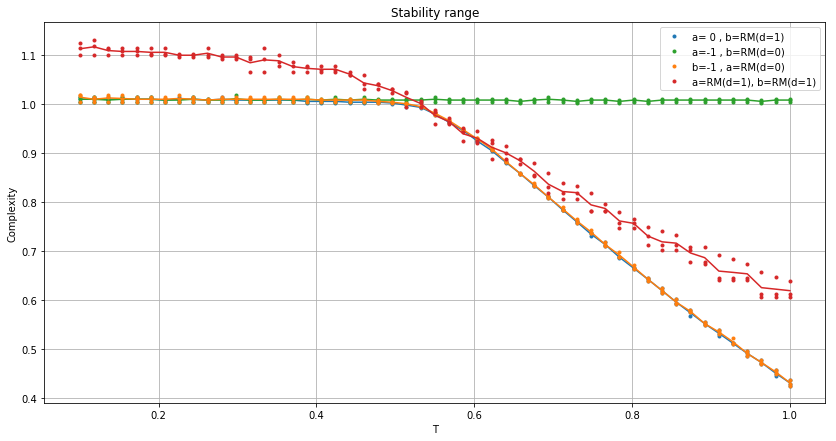

In [165]:
fig, ax = plt.subplots(sharey=True)
fig = plt.gcf()
fig.set_size_inches(14,7)

cc = ['#1f77b4','#2ca02c','#ff7f0e','#d62728','#9467bd','#1f77b4','#ff7f0e','#2ca02c','#d62728','#9467bd']
matr = ['a= 0 , b=RM(d=1)','a=-1 , b=RM(d=0)','b=-1 , a=RM(d=0)','a=RM(d=1), b=RM(d=1)']
for a in range(4):
    plt.plot(Tvec,(Complex[a,0,:]+Complex[a,1,:]+Complex[a,2,:])/3,'--',color=cc[a])
    plt.plot(Tvec,Complex[a,0,:],'.',color=cc[a])#,label=f'changing $\sigma$')
    plt.plot(Tvec,Complex[a,1,:],'.',color=cc[a])#,label=f'changing C')
    plt.plot(Tvec,Complex[a,2,:],'.',color=cc[a],label=matr[a])#,label=f'changing S')

plt.xlabel('T')
plt.ylabel('Complexity')
plt.title("Stability range")
plt.grid()
plt.legend()

plt.show()

# Cases in which b = b(T)

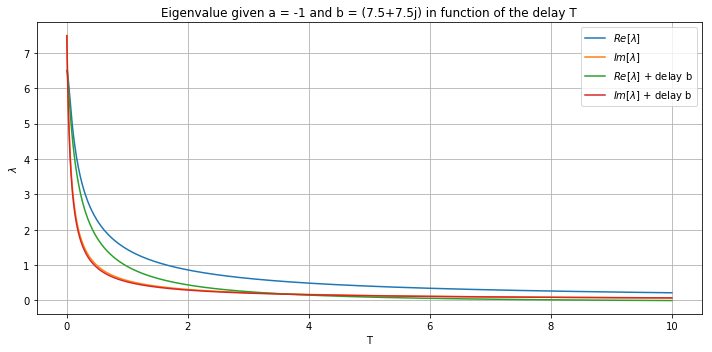

In [164]:
evlA = -1
evlB = 7.5 + 7.5j
T = np.linspace(0.0001,10,1000)
f = lambda_funct (evlA,evlB,T)
f1 = lambda_funct (evlA,evlB/(1+T),T)

fig, ax = plt.subplots(sharey=True)
fig = plt.gcf()
fig.set_size_inches(10,5)

plt.plot(T,f.real,label=f'$Re[\lambda]$')
plt.plot(T,f.imag,label=f'$Im[\lambda]$')
plt.plot(T,f1.real,label=f'$Re[\lambda]$ + delay b')
plt.plot(T,f1.imag,label=f'$Im[\lambda]$ + delay b')

plt.xlabel('T')
plt.ylabel(r'$\lambda $')
plt.title(f"Eigenvalue given a = {evlA} and b = {evlB} in function of the delay T")
plt.grid()
plt.legend()

fig.tight_layout()
plt.show(fig)

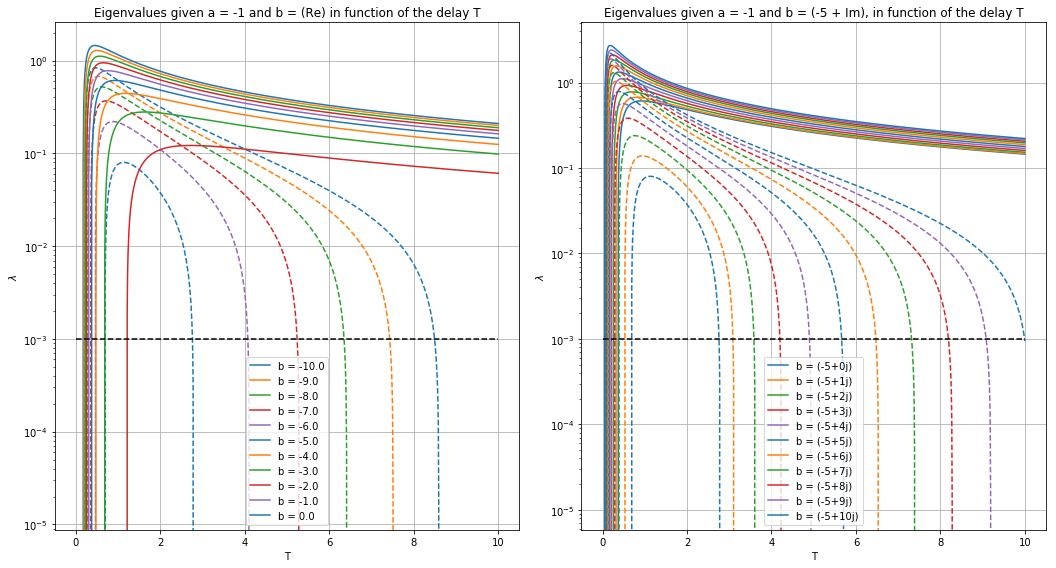

In [144]:
X = np.linspace(-10,0,11)
Y = np.linspace( 0,10,11)
T = np.linspace(0.001,10,1000)
cc = ['#1f77b4','#ff7f0e','#2ca02c','#d62728','#9467bd','#1f77b4','#ff7f0e','#2ca02c','#d62728',
      '#9467bd','#1f77b4','#ff7f0e','#2ca02c','#d62728','#9467bd']

fig, ax = plt.subplots(sharey=True)
fig = plt.gcf()
fig.set_size_inches(15,8)

plt.subplot(1,2,1)
for i,x in enumerate(X):
    evlA = -1
    evlB = x
    f = lambda_funct (evlA,evlB,T)+10**(-3)
    f1 = lambda_funct (evlA,evlB/(1+T),T)+10**(-3)
    plt.plot(T,f.real,color=cc[i],label=f'b = {evlB}')
    plt.plot(T,f1.real,'--',color=cc[i])
plt.plot(T,10**(-3)*np.ones(len(T)),'k--')

plt.xlabel('T')
plt.ylabel(r'$\lambda $')
plt.yscale('log')
plt.title(f"Eigenvalues given a = {evlA} and b = (Re) in function of the delay T")
plt.grid()
plt.legend()

plt.subplot(1,2,2)
for i,x in enumerate(Y):
    evlA = -1
    evlB = -5+1.j*x
    f = lambda_funct (evlA,evlB,T)+10**(-3)
    f1 = lambda_funct (evlA,evlB/(1+T),T)+10**(-3)
    plt.plot(T,f.real,color=cc[i],label=f'b = {evlB}')
    plt.plot(T,f1.real,'--',color=cc[i])
plt.plot(T,10**(-3)*np.ones(len(T)),'k--')

plt.xlabel('T')
plt.ylabel(r'$\lambda $')
plt.yscale('log')
plt.title(f"Eigenvalues given a = {evlA} and b = (-5 + Im), in function of the delay T")
plt.grid()
plt.legend()

fig.tight_layout()
plt.show(fig)

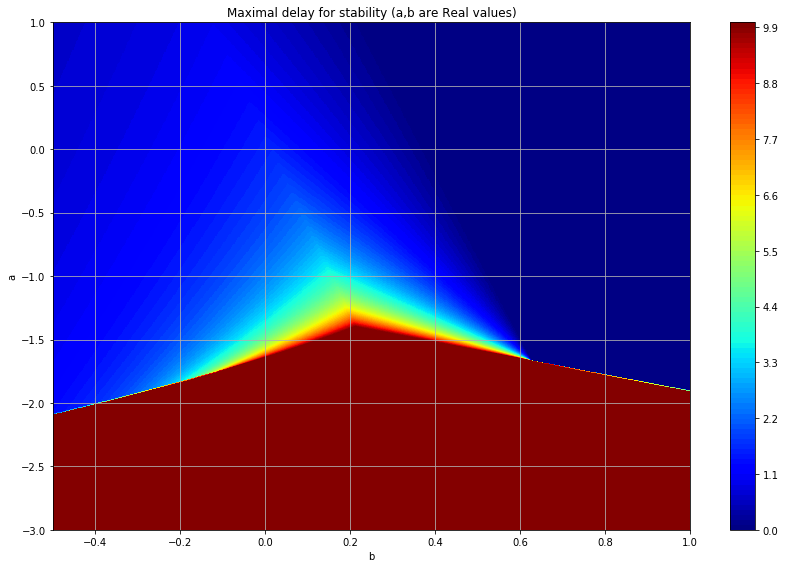

In [47]:
b_vals = np.linspace(-3,1,500)
b1_vals = np.linspace(-0.5,1,500)
T = np.linspace(0.0001,10,200)

t_max = np.zeros((len(b_vals),len(b_vals)))

for i,evlA in enumerate(b1_vals):
    for j,evlB in enumerate(b_vals):
        f = lambda_funct (evlA,evlB/(1+T),T)
        ind = f.real <= 0
        t = T[ind]
        if t.size != 0:
            t_max[i,j] = t[-1]
        
fig, ax = plt.subplots(sharey=True)
fig = plt.gcf()
fig.set_size_inches(12,8)

plt.contourf(b1_vals, b_vals, t_max, 100, cmap='jet')
#plt.imshow(t_max, extent=[b1_vals[0], b1_vals[-1], b_vals[0], b_vals[-1]], origin='lower',cmap='jet')
plt.colorbar()
plt.axis(aspect='image')
plt.xlabel('b')
plt.ylabel('a')
plt.title(f"Maximal delay for stability (a,b are Real values)")
plt.grid()

fig.tight_layout()
plt.show(fig)

In [240]:
T = np.linspace(0.0001,10,1000)
t_max = np.zeros((100,100,2))
t_min = np.zeros((100,100,2))
b1_vals = np.linspace(-7.5,7.5,100)
b_vals = np.linspace(-7.5,7.5,100)

for i,x in enumerate(b1_vals):
    for j,y in enumerate(b_vals):
        evlB = x + 1.j*y
        f = lambda_funct (-1,evlB/(1+T),T)      
        if np.all(f.real < 0):
            t_max[i,j,0] = T[-1]
            t_min[i,j,0] = T[-1]
        elif np.all(f.real > 0):
            t_max[i,j,0] = T[-1]
            t_min[i,j,0] = 0
        else :
            ind = abs(f.real) <= 0.2
            t = T[ind]
            f_1 = f[ind].real
            ii = argrelextrema(abs(f_1), np.less)
            t = t[ii]  
            if f_1[ii[0][0]-1] < 0 :
                if t.size == 1:
                    t_max[i,j,0] = T[-1]
                    t_min[i,j,0] = t[0]
                elif t.size == 2:
                    t_max[i,j,0] = t[1]
                    t_min[i,j,0] = t[0]
            elif f_1[ii[0][0]-1] > 0 :
                if t.size == 1:
                    t_max[i,j,0] = t[0]
                    t_min[i,j,0] = 0
                elif t.size == 2:
                    print('error')
        evlB = (x-4.5)/2 + 1.j*y/3
        f = lambda_funct (0,evlB/(1+T),T)
        ind = f.real <= 0
        t = T[ind]
        if t.size != 0:
            t_min[i,j,1] = t[-1]

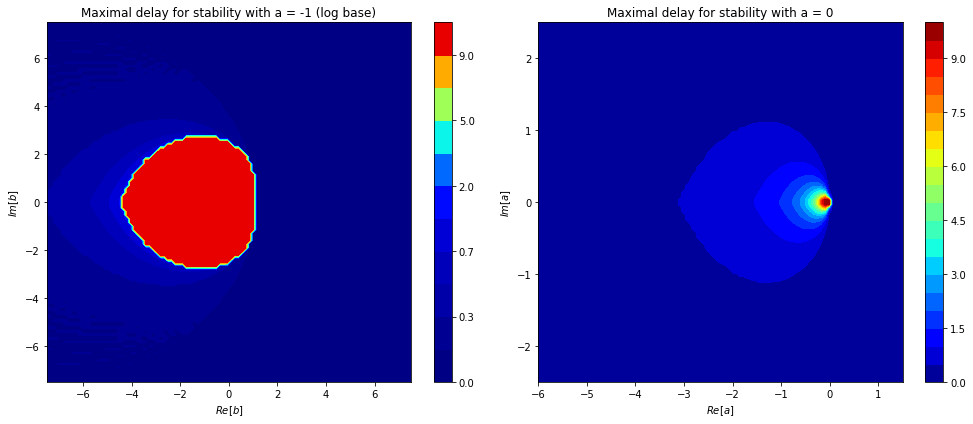

In [241]:
import matplotlib.ticker as tkr

fig, ax = plt.subplots(sharey=True)
fig = plt.gcf()
fig.set_size_inches(14,6)

plt.subplot(1,2,1)
plt.contourf(b1_vals, b_vals, (t_min[:,:,0].T),levels=[0,0.1,0.3,0.5,0.7,1,2,3,5,7,9,11], cmap='jet')#locator=tkr.LogLocator(),
#plt.contourf(b1_vals, b_vals, t_max[:,:,0].T, 20, cmap='jet')
plt.colorbar()
plt.axis(aspect='image')
plt.xlabel(f'$Re[b]$')
plt.ylabel(f'$Im[b]$')
plt.title(f"Maximal delay for stability with a = {-1} (log base)")
#plt.grid()

plt.subplot(1,2,2)
plt.contourf((b1_vals-4.5)/2, b_vals/3, t_min[:,:,1].T, 20, cmap='jet')
#plt.contourf((b1_vals-4.5)/2, b_vals/3, t_max[:,:,1].T, 20, cmap='jet')
plt.colorbar()
#contours = plt.contour((b1_vals-4.5)/2, b_vals/3, t_min[:,:,1].T, 5, colors='black')
#contours = plt.contour((b1_vals-4.5)/2, b_vals/3, t_max[:,:,1].T, 5, colors='black')
#plt.clabel(contours, inline=True, fontsize=10)
plt.axis(aspect='image')
plt.xlabel(f'$Re[a]$')
plt.ylabel(f'$Im[a]$')
plt.title(f"Maximal delay for stability with a = {0}")
#plt.grid()

fig.tight_layout()
plt.show(fig)